In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Funciones necesarias para el funcionamiento del algoritmo

# Devuelve un diccionario con el valor de los centroides
def getCentroids(data, clusterQuantity):
  centroids = {}
  for i in range(clusterQuantity):
    centroids[i+1] = {}
    centroids[i+1]['X'] = data.loc[data['Cluster'] == i+1, 'X'].sum() / sum(data['Cluster'] == i+1)
    centroids[i+1]['Y'] = data.loc[data['Cluster'] == i+1, 'Y'].sum() / sum(data['Cluster'] == i+1)
  return centroids


# Crea la tabla de error de los cluster
def getClusterErrors(data, centroids, clusterQuantity):
  error = {}
  for i in range(clusterQuantity):
    error[i+1] = []
    for index, row in data.iterrows():
      error[i+1].append(pow(row['X'] - centroids[i+1]['X'], 2) + pow(row['Y'] -  centroids[i+1]['Y'], 2))
  return pd.DataFrame(error)


# Devuelve una lista con los nuevos Clusters
def getNewClusters(data, centroids, clusterQuantity):
  errorTable = getClusterErrors(data, centroids, clusterQuantity)
  newClusters = errorTable.idxmin(axis=1).tolist()
  sse = 0
  for index, row in errorTable.iterrows():
    sse += row[newClusters[index]]
  return newClusters, sse

# Funcion para graficar los datos
def graphData(df, centroids = False):
  colors = {1: 'red', 2: 'blue'}
  labels = {1: 'Cluster 1', 2: 'Cluster 2'}
  for cluster, data in df.groupby('Cluster'):
    plt.scatter(data['X'], data['Y'], color=colors[cluster], label=labels[cluster])
  if(centroids):
    plt.scatter(centroids[1]['X'], centroids[1]['Y'], color='purple', marker='*', label='Centroide Cluster 1')
    plt.scatter(centroids[2]['X'], centroids[2]['Y'], color='green', marker='*', label='Centroides Cluster 2')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Gráfico de valores X y Y por cluster')
  plt.legend()
  plt.grid(True)
  plt.show()


       X    Y  Cluster
0     38  236        1
1    909   73        1
2    768  906        1
3    716  646        2
4    848  961        2
..   ...  ...      ...
995  205   23        2
996  143  409        2
997  175  749        1
998  492  617        2
999  289  209        1

[1000 rows x 3 columns]


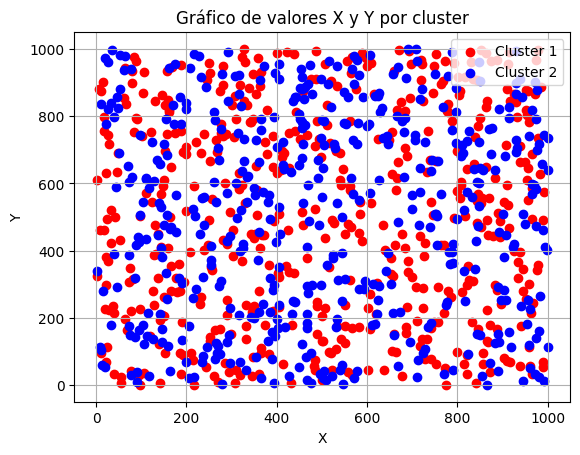

In [ ]:
# Aqui se crea el dataset

# cluster = [1,2,1,2,1,2,1,2,1,2]
# X = [5,5,3,0,2,4,2,2,1,5]
# Y = [0,2,1,4,1,2,2,3,3,4]
# data = pd.DataFrame({'Cluster': cluster, 'X': X, 'Y': Y})

# Generar datos aleatorios
np.random.seed(1)
dfSize = 1000

tempData = np.random.randint(1, 1001, size=(dfSize, 2))
randomClusters = np.random.choice([1, 2], size=dfSize)

# Crear DataFrame
data = pd.DataFrame(tempData, columns=['X', 'Y'])
data['Cluster'] = randomClusters

print(data)
graphData(data)

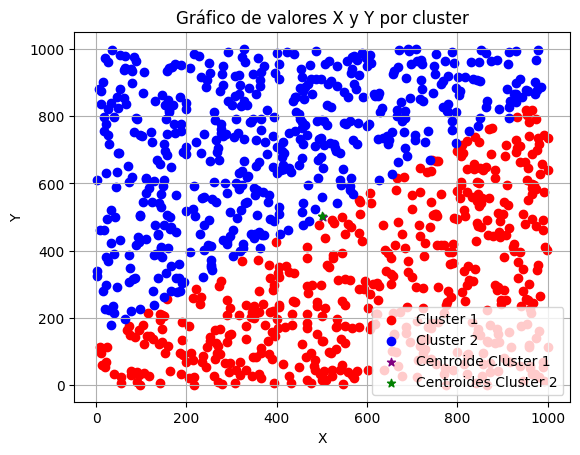

ITERATION: 1
SSE: 172429682.82654738
Converges: False


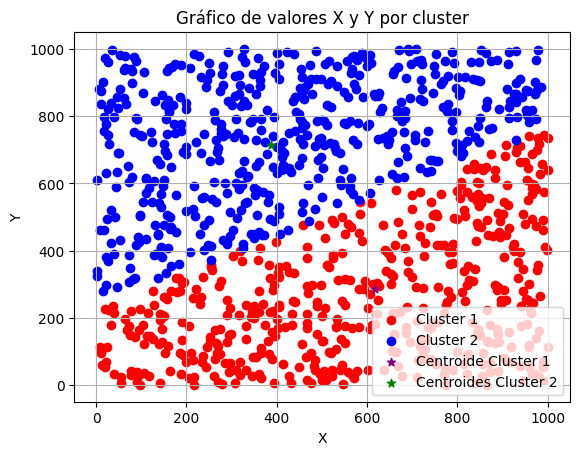

ITERATION: 2
SSE: 112928722.56281628
Converges: False


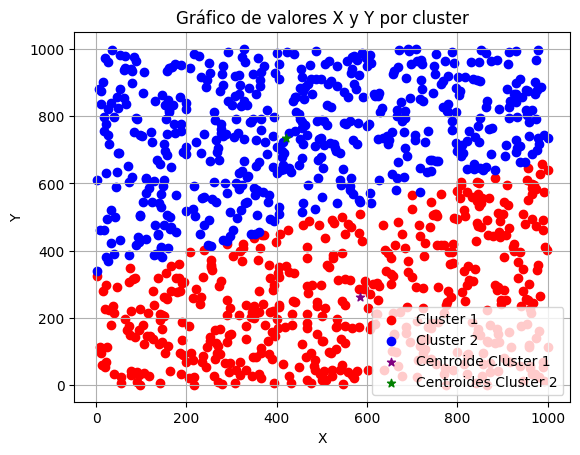

ITERATION: 3
SSE: 109898429.80041532
Converges: False


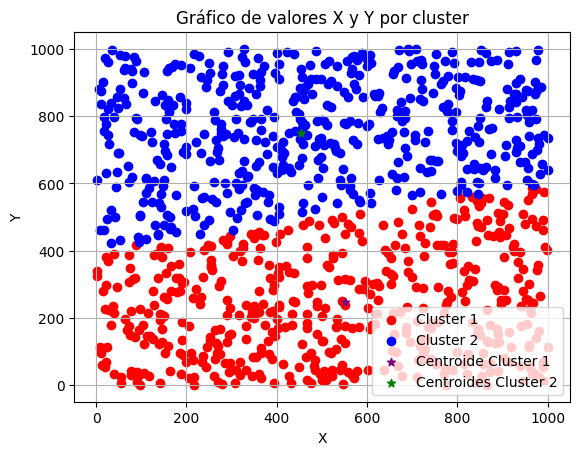

ITERATION: 4
SSE: 107460371.74579175
Converges: False


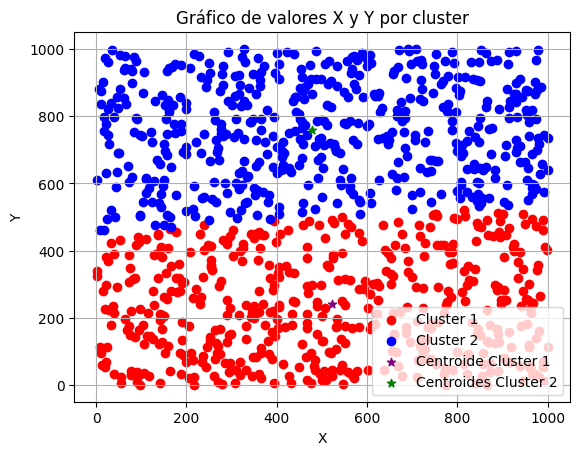

ITERATION: 5
SSE: 106024778.69769976
Converges: False


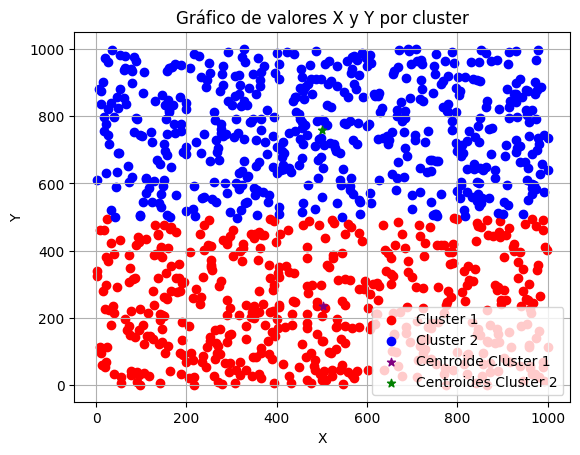

ITERATION: 6
SSE: 105331311.15362704
Converges: False


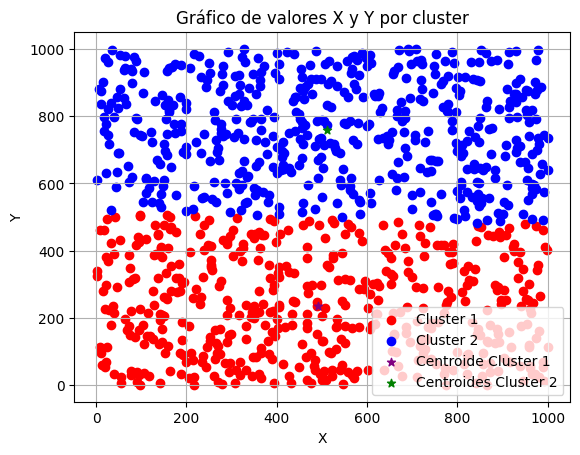

ITERATION: 7
SSE: 105061898.58028881
Converges: False


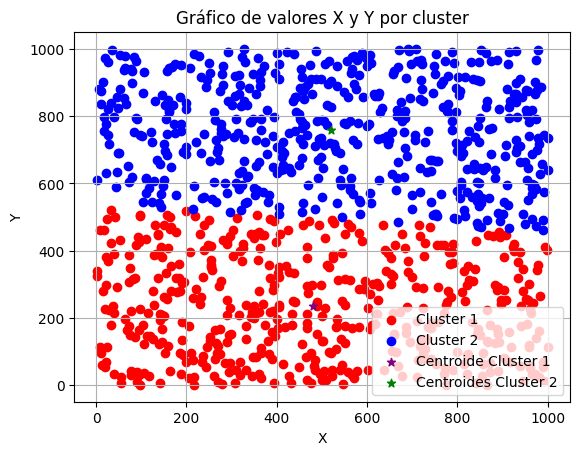

ITERATION: 8
SSE: 104892392.02124035
Converges: False


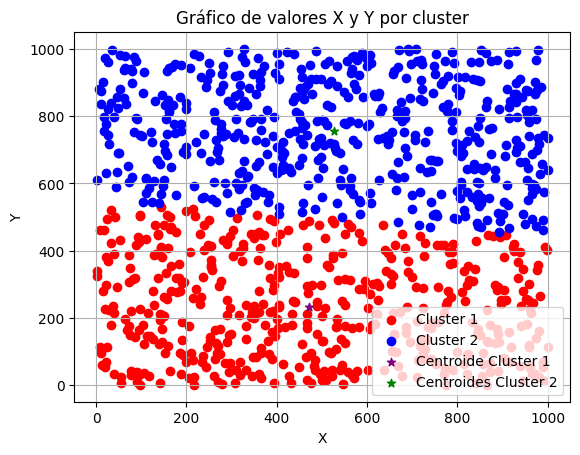

ITERATION: 9
SSE: 104820366.08603534
Converges: False


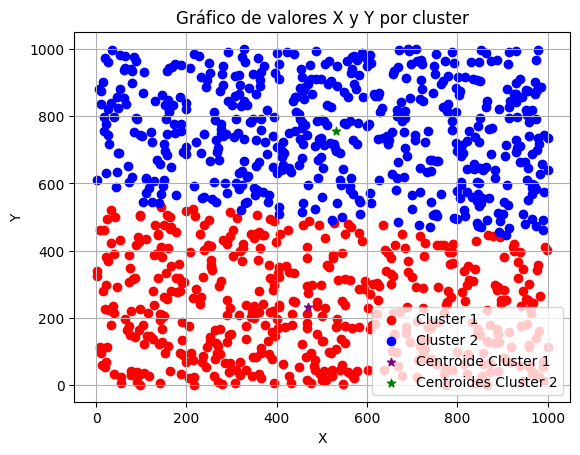

ITERATION: 10
SSE: 104808996.16912857
Converges: False


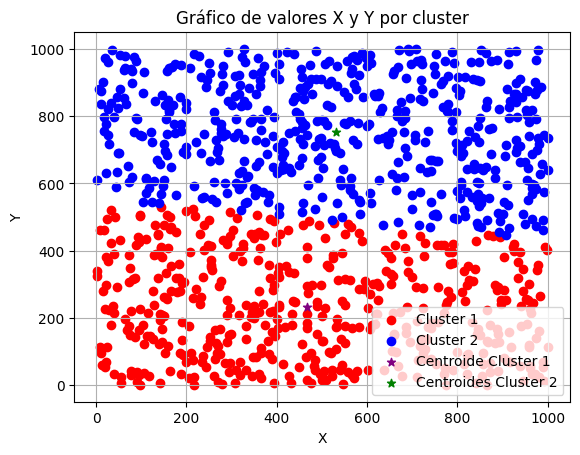

ITERATION: 11
SSE: 104806538.82266173
Converges: False


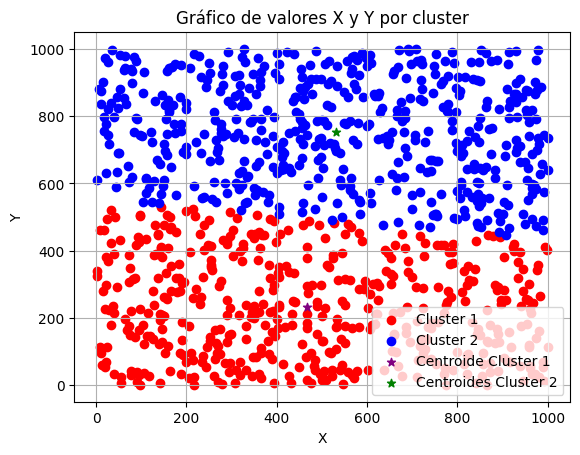

ITERATION: 12
SSE: 104806187.6116726
Converges: True


In [ ]:
# Algoritmo K-Means

clusterQuantity = 2
converges = False
iterNumber = 0;

while not converges:
  centroids = getCentroids(data, clusterQuantity)
  newClusters, sse = getNewClusters(data, centroids, clusterQuantity)
  if(data['Cluster'].tolist() == newClusters):
    converges = True
  data['Cluster'] = newClusters
  iterNumber += 1
  graphData(data, centroids)
  print("ITERATION: " + str(iterNumber) + "\nSSE: " + str(sse) + "\nConverges: " + str(converges) + "\n========================================")


**Conclusiones:**



1.   Util para encontrar patrones y estructuras en los datos sin la necesidad de etiquetas o información de clasificación previa

2.  Los centroides son puntos en el espacio de características que representan el centro de cada cluster.

3.   A medida que el algoritmo itera, los centroides se ajustan para representar mejor los datos.

4. Los valores iniciales afectan bastante el rendimiento del algoritmo.



